### Experiment v4 – Company Size (Numeric)

Company size was introduced as a numeric feature representing employee count.
This captures organizational scale effects on salary across industries.




In [34]:
import pandas as pd
import numpy as np


In [35]:
df=pd.read_csv("/content/drive/MyDrive/Salary Predictor/Salary Data.csv")
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [36]:
df[['Age', 'Years of Experience', 'Salary']].head(10)


,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
5,29.0,2.0,55000.0
6,42.0,12.0,120000.0
7,31.0,4.0,80000.0
8,26.0,1.0,45000.0
9,38.0,10.0,110000.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [38]:
print(df.dtypes)

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [39]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [40]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [42]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Education Level']=df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title']=df['Job Title'].fillna(df['Job Title'].mode()[0])

In [43]:
df.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    object 
 2   Education Level      375 non-null    object 
 3   Job Title            375 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [45]:
def map_industry(job_title):
    title = job_title.lower()

    # Tech & IT
    if any(x in title for x in [
        'software', 'developer', 'engineer', 'it ', 'network', 'architect', 'technical', 'qa'
    ]):
        return 'Tech'

    # Data & Analytics
    elif any(x in title for x in [
        'data', 'analyst', 'scientist', 'analytics', 'bi ', 'business intelligence'
    ]):
        return 'Data / Analytics'

    # Finance
    elif any(x in title for x in [
        'finance', 'financial', 'accountant', 'accounting', 'advisor', 'audit'
    ]):
        return 'Finance'

    # Marketing
    elif any(x in title for x in [
        'marketing', 'seo', 'brand', 'content', 'digital', 'social media'
    ]):
        return 'Marketing'

    # Sales
    elif any(x in title for x in [
        'sales', 'account executive', 'business development', 'customer success'
    ]):
        return 'Sales'

    # HR
    elif any(x in title for x in [
        'hr', 'human resources', 'recruit', 'talent'
    ]):
        return 'HR'

    # Design & Creative
    elif any(x in title for x in [
        'designer', 'ux', 'ui', 'graphic', 'creative', 'copywriter'
    ]):
        return 'Design / Creative'

    # Healthcare
    elif any(x in title for x in [
        'health', 'medical', 'nurse', 'doctor', 'clinical'
    ]):
        return 'Healthcare'

    # Education & Research
    elif any(x in title for x in [
        'research', 'scientist', 'professor', 'teacher', 'education'
    ]):
        return 'Education / Research'

    # Operations & Management (default)
    else:
        return 'Operations / Management'


In [46]:
df['Industry'] = df['Job Title'].apply(map_industry)


In [47]:
df['Industry'].value_counts()


,count
Industry,
Operations / Management,88
Data / Analytics,87
Marketing,60
Tech,41
Sales,34
HR,24
Finance,20
Design / Creative,19
Education / Research,2


In [48]:
df[['Job Title', 'Industry']].sample(15)


,Job Title,Industry
167,Senior Researcher,Education / Research
113,Senior Business Analyst,Data / Analytics
132,Senior Training Specialist,Operations / Management
210,Senior IT Consultant,Tech
342,Junior Financial Analyst,Data / Analytics
125,Junior Accountant,Finance
253,Junior Business Development Associate,Sales
235,Junior Sales Representative,Sales
58,Social Media Manager,Marketing
121,Director of Marketing,Marketing


In [49]:
def genearate_company_size():
  company_type= np.random.choice(
      ['startup', 'small', 'medium', 'large'],
      p=[0.25 , 0.30, 0.25 , 0.20]
  )
  return company_type



df['Company_size'] = df.apply(lambda x: genearate_company_size() , axis=1)

In [50]:
df['Company_size'].head()


,Company_size
0,startup
1,startup
2,medium
3,medium
4,large


<Axes: >

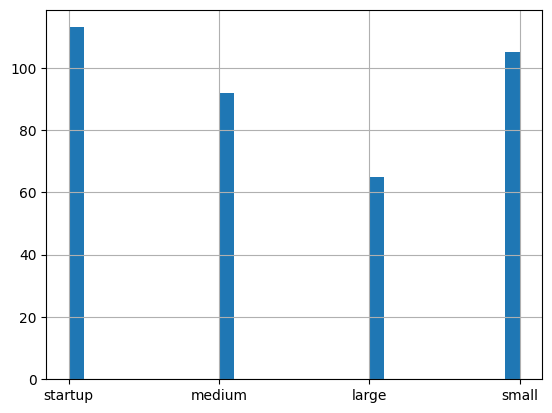

In [51]:
df['Company_size'].hist(bins=30)


In [52]:
#seperating features from target
X= df.drop('Salary', axis=1)  #features
y=df['Salary']                # salary

In [53]:
categorical_cols = ['Gender', 'Education Level', 'Job Title','Industry','Company_size']
numerical_cols=['Age', 'Years of Experience']

In [54]:
#applying one hot encoding
x_encoded=pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [55]:
x_encoded.head()

,Age,Years of Experience,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,Job Title_Business Intelligence Analyst,...,Industry_Education / Research,Industry_Finance,Industry_HR,Industry_Marketing,Industry_Operations / Management,Industry_Sales,Industry_Tech,Company_size_medium,Company_size_small,Company_size_startup
0,32.0,5.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,28.0,3.0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,45.0,15.0,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,36.0,7.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,52.0,20.0,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [56]:
#standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_encoded[numerical_cols]=scaler.fit_transform(x_encoded[numerical_cols])

In [57]:
#performing train test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(x_encoded, y, test_size=0.2 , random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)

(300, 189)
(75, 189)


In [59]:
#Model 1-linear Regression
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [60]:
#making Predictions
y_pred_lr = lr_model.predict(X_test)


In [61]:
#evaluation of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
import numpy as np


In [62]:
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression model Results:")
print("MAE:", mae)
print("RMsE:", rmse)
print("R2 score:", r2)

Linear Regression model Results:
MAE: 12260.642044401484
RMsE: 18438.618775002506
R2 score: 0.8596875568171078


In [63]:
#Model 2 - Random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100 , random_state=42)
rf_model.fit(X_train , y_train)

RandomForestRegressor(random_state=42)

In [64]:
y_pred_rf = rf_model.predict(X_test)

In [65]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest model Results:")
print("MAE:", mae_rf)
print("RMsE:", rmse_rf)
print("R2 score:", r2_rf)


Random Forest model Results:
MAE: 10601.286666666667
RMsE: 16167.93875225493
R2 score: 0.8921180651179235


In [67]:
import joblib
joblib.dump(rf_model, "version4_model.pkl")

['version4_model.pkl']

In [68]:
joblib.dump(scaler, "scaler4.pkl")

['scaler4.pkl']

In [69]:
joblib.dump(x_encoded.columns, "model_features4.pkl")

['model_features4.pkl']

### Insight: Categorical vs Numeric Company Size

While numeric company size introduced noise due to simulated values,
categorical company size (startup/small/medium/large) significantly improved model performance.
This highlights the importance of abstraction when real quantitative data is unavailable.

